In [ ]:
# 流程：
# 1、加载数据
# 2、将数据集分成小批次
# 3、选择损失函数和优化器
# 4、初始化超参数（学习率，训练轮数，批量大小）
# 5、设计模型（隐藏层，激活函数）
# 6、训练模型
# 7、测试模型

In [9]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn         # 神经网络模块
import torch.optim as optim     # 优化器模块

from torch.utils.data import DataLoader  # 数据加载器，用于批量加载数据（将数据切成小份，即批次epoch）
# from torch.utils.data import random_split # 随机划分数据集

from torchvision.datasets import MNIST # MNIST数据集,包含​​60,000张训练图像​​和​​10,000张测试图像​​，每张为​​28×28像素的灰度图​​，共​​10个类别​​。
from torchvision.transforms import ToTensor # 图像转换模块，用于数据预处理   将图像数据转换成张量，能得到一个张量的矩阵

In [8]:
# 加载数据集    60000张训练集，10000张测试集
train_dataset = MNIST(root='data/MNIST', 
                             train=True, 
                             download=True,
                             transform=ToTensor()) # 将数据集转换成张量
test_dataset = MNIST(root='data/MNIST', 
                            train=False, 
                            download=True,
                             transform=ToTensor()) 

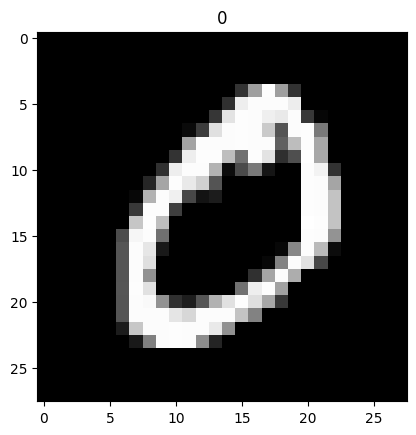

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [10]:
import matplotlib.pyplot as plt
# 可视化数据集中的一张图片
train_data = MNIST(root='data/MNIST', train=True, download=True)
# train_data是一个数据集对象，包含了训练数据和标签
# train_data[0]是一个元组，包含了图片和标签

img,clzz = train_data[1]
plt.imshow(img, cmap='gray')  # img是一个PIL.Image对象(python原始数据)
plt.title(clzz)
plt.show()

labels = set([clz for img,clz in train_data])
labels

In [11]:
# 数据加载器，将数据集分成小批次，方便训练和测试
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True) # 训练集加载器，batch_size为每个批次的大小，shuffle为是否打乱数据
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False) # 测试集加载器，batch_size为每个批次的大小，shuffle为是否打乱数据

In [ ]:
# 训练模型
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    train_loss_history = []  # 训练损失列表，用于存储每个批次的训练损失

    model.train()  # 设置模型为训练模式
    
    for epoch in range(num_epochs):  # 遍历训练轮数
        for batch_images, batch_labels in train_loader:
            batch_images = batch_images.view(batch_images.size(0), -1)  # 展平图像数据

            # 前向传播
            outputs = model(batch_images)

            # 计算损失
            loss = criterion(outputs, batch_labels)

            # 清空梯度
            optimizer.zero_grad()
            # 反向传播
            loss.backward()
            # 更新参数
            optimizer.step()

        # 打印训练损失
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

        train_loss_history.append(loss.item())  # 将每个批次的训练损失添加到列表中

        # 训练完成后，保存模型
        # torch.save(model.state_dict(), 'model.pth')
        # break  # 仅训练一个批次
        
    return train_loss_history  # 返回训练损失列表，用于绘制损失曲线图

In [ ]:
# model1_loss_history[19],model2_loss_history[19],model3_loss_history[19] # 训练损失曲线图的最后一个点的值

# 调整超参数 - 学习率


In [24]:
model_lr = nn.Sequential(
    nn.Linear(1 * 28 * 28, 128),  # 全连接层，将输入张量映射到128个神经元
    nn.Sigmoid(),  # 激活函数，使用Sigmoid函数进行非线性变换
    nn.Linear(128, 10)  # 全连接层，将128个神经元映射到10个类别
)

In [ ]:
# 超参数设置
# learning_rate = 0.1  # 学习率
num_epochs = 20  # 训练轮数
batch_size = 300  # 批量大小

In [ ]:
criterion = nn.CrossEntropyLoss()  # 损失函数，交叉熵损失函数
# optimizer = optim.SGD(model_lr.parameters(), lr=learning_rate)  # 优化器，SGD优化器，学习率为0.1

In [29]:
lr_loss_history = [
    train_model(model_lr, train_loader, criterion, optim.SGD(model_lr.parameters(), lr=0.1), num_epochs) # 学习率为0.1的模型训练损失历史
    , train_model(model_lr, train_loader, criterion, optim.SGD(model_lr.parameters(), lr=0.01), num_epochs) # 学习率为0.01的模型训练损失历史
    , train_model(model_lr, train_loader, criterion, optim.SGD(model_lr.parameters(), lr=0.001), num_epochs) # 学习率为0.001的模型训练损失历史
]

Epoch [1/20], Loss: 0.4722
Epoch [2/20], Loss: 0.1664
Epoch [3/20], Loss: 0.0855
Epoch [4/20], Loss: 0.1657
Epoch [5/20], Loss: 0.2380
Epoch [6/20], Loss: 0.3017
Epoch [7/20], Loss: 0.1404
Epoch [8/20], Loss: 0.3485
Epoch [9/20], Loss: 0.1219
Epoch [10/20], Loss: 0.1286
Epoch [11/20], Loss: 0.1897
Epoch [12/20], Loss: 0.2285
Epoch [13/20], Loss: 0.0702
Epoch [14/20], Loss: 0.0647
Epoch [15/20], Loss: 0.2679
Epoch [16/20], Loss: 0.1060
Epoch [17/20], Loss: 0.0941
Epoch [18/20], Loss: 0.0393
Epoch [19/20], Loss: 0.0604
Epoch [20/20], Loss: 0.0382
Epoch [1/20], Loss: 0.0684
Epoch [2/20], Loss: 0.2057
Epoch [3/20], Loss: 0.0950
Epoch [4/20], Loss: 0.0755
Epoch [5/20], Loss: 0.2235
Epoch [6/20], Loss: 0.0592
Epoch [7/20], Loss: 0.0788
Epoch [8/20], Loss: 0.0238
Epoch [9/20], Loss: 0.1849
Epoch [10/20], Loss: 0.0823
Epoch [11/20], Loss: 0.0584
Epoch [12/20], Loss: 0.0685
Epoch [13/20], Loss: 0.0559
Epoch [14/20], Loss: 0.0564
Epoch [15/20], Loss: 0.2257
Epoch [16/20], Loss: 0.0500
Epoch [17/

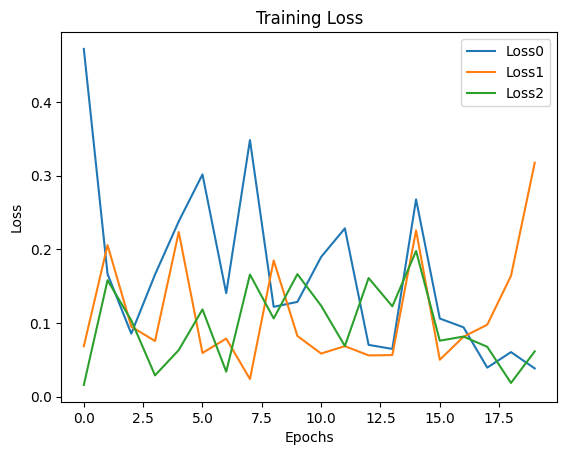

In [ ]:
def draw_train_hist(lr_loss_history):
    for i,hist in enumerate(lr_loss_history):   
        plt.plot(hist, label=f'LR_Loss{i}')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

# 绘制训练损失曲线图
draw_train_hist(lr_loss_history)

model.parameters()是模型的参数，学习率为0.001

In [ ]:

# 选择损失函数
criterion = nn.CrossEntropyLoss()  # 损失函数，交叉熵损失函数

# criterion = nn.MSELoss()  # 损失函数，均方误差损失函数

# criterion = nn.NLLLoss()  # 损失函数，负对数似然损失函数，适用于多分类问题
# criterion = nn.NLLLoss(reduction='none')  # 损失函数，负对数似然损失函数，适用于多分类问题，reduction='none'表示不进行归约操作
# criterion = nn.NLLLoss(reduction='sum')  # 损失函数，负对数似然损失函数，适用于多分类问题，reduction='sum'表示对所有样本的损失进行求和
# criterion = nn.NLLLoss(reduction='mean')  # 损失函数，负对数似然损失函数，适用于多分类问题，reduction='mean'表示对所有样本的损失进行求平均

# criterion = nn.BCEWithLogitsLoss()  # 损失函数，二进制交叉熵损失函数，适用于多标签分类问题
# criterion = nn.BCEWithLogitsLoss(reduction='none')  # 损失函数，二进制交叉熵损失函数，适用于多标签分类问题，reduction='none'表示不进行归约操作
# criterion = nn.BCEWithLogitsLoss(reduction='sum')  # 损失函数，二进制交叉熵损失函数，适用于多标签分类问题，reduction='sum'表示对所有样本的损失进行求和
# criterion = nn.BCEWithLogitsLoss(reduction='mean')  # 损失函数，二进制交叉熵损失函数，适用于多标签分类问题，reduction='mean'表示对所有样本的损失进行求平均

# criterion = nn.BCELoss()  # 损失函数，二进制交叉熵损失函数，适用于二分类问题
# criterion = nn.BCELoss(reduction='none')  # 损失函数，二进制交叉熵损失函数，适用于多标签分类问题，reduction='none'表示不进行归约操作
# criterion = nn.BCELoss(reduction='sum')  # 损失函数，二进制交叉熵损失函数，适用于多标签分类问题，reduction='sum'表示对所有样本的损失进行求和
# criterion = nn.BCELoss(reduction='mean')  # 损失函数，二进制交叉熵损失函数，适用于多标签分类问题，reduction='mean'表示对所有样本的损失进行求平均


# 选择优化器
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # 优化器，Adam优化器
# optimizer = optim.SGD(model.parameters(), lr=learning_rate)  # 优化器，随机梯度下降优化器
# optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)  # 优化器，RMSprop优化器